# Random variables

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
from scipy import stats

In [4]:
dist = stats.norm(100, 15)

In [5]:
xs = np.linspace(50, 150, 100)

### PDF

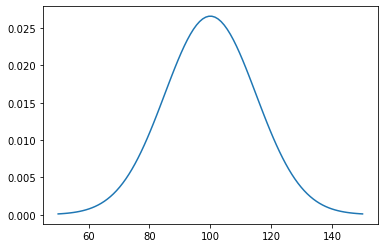

In [6]:
plt.plot(xs, dist.pdf(xs))
pass

### CDF

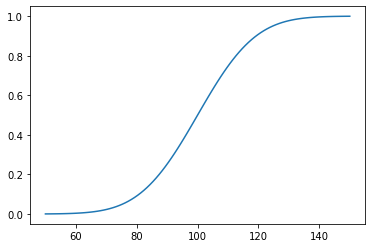

In [7]:
plt.plot(xs, dist.cdf(xs))
pass

### Quantiles

In [9]:
xs = np.linspace(0, 1, 100)

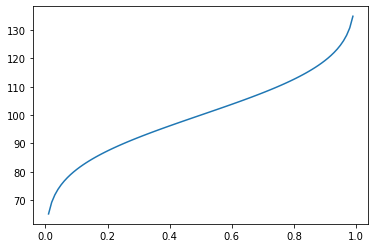

In [10]:
plt.plot(xs, dist.ppf(xs))
pass

### Random variables

In [16]:
n = 1000
sns.displot(dist.rvs(n), kind='hist')
pass

AttributeError: module 'seaborn' has no attribute 'displot'

### Simulation

In [17]:
n = 1_000_000
iqs = dist.rvs(n)

Proportion with values less than or equal to 120

In [18]:
dist.cdf(120)

0.9087887802741321

In [19]:
np.mean(iqs <= 120)

0.908936

Value at 90th percentile

In [20]:
dist.ppf(0.9)

119.22327348316901

In [21]:
np.sort(iqs)[int(0.9*n)]

119.1958849611039

### Log likelihood

In [22]:
xs = np.random.normal(3, 1, 10)

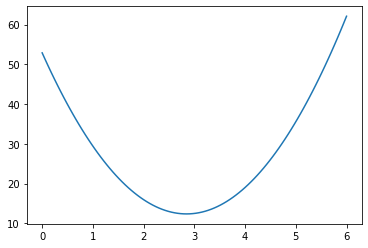

In [23]:
mus = np.linspace(0, 6, 100)

@np.vectorize
def negloglik(mu, xs=xs):
    return -stats.norm.logpdf(xs, mu, scale=1).sum()

plt.plot(mus, negloglik(mus))
pass

### MLE

In [24]:
import scipy.optimize as opt

In [26]:
opt.minimize_scalar(negloglik, (0, 6)) 

     fun: array(12.35265724)
    nfev: 9
     nit: 5
 success: True
       x: 2.8464371531032375

The `fit` method performs MLE

In [27]:
μ, σ = stats.norm.fit(xs, fscale=1) # fix sigma at 1

In [28]:
μ, σ

(2.8464371531032375, 1)

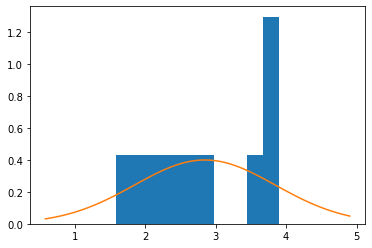

In [29]:
x = np.linspace(xs.min()-1, xs.max()+1, 100)
plt.hist(xs, density=True)
plt.plot(x, stats.norm(μ, σ).pdf(x))
pass

### Confidence intervals

In [30]:
α = stats.norm(0, 1).ppf([0.95])

In [31]:
np.r_[μ - α*σ, μ + α*σ]

array([1.20158353, 4.49129078])

In [32]:
stats.norm(μ, σ).interval(0.9)

(1.2015835261517647, 4.49129078005471)